In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib notebook

In [2]:
n = str(1) #chiller number
df = pd.read_csv("data/Chiller"+n+"_full.csv")
df.index = pd.to_datetime(df['ts'])
df.drop('ts', axis=1, inplace=True)
df.head()

,ch1Watt,ch2Watt,ch3Watt,value1,value2,value3,value4,conflowRate,conflowSpeed,evaflowRate,evaflowSpeed
ts,,,,,,,,,,,
2017-05-01 00:00:00,349.0,0.0,353.0,18.068238,20.535583,23.376769,23.387453,0.000000,0.000000,0.000000,0.00000
2017-05-01 00:01:00,383.0,0.0,396.0,16.166991,16.914672,22.565002,22.639772,35.284023,0.303604,0.000000,0.00000
2017-05-01 00:02:00,379.0,0.0,394.0,15.964052,16.722413,22.372743,22.351379,144.330154,1.241898,0.000000,0.00000
2017-05-01 00:03:00,389.0,0.0,408.0,17.053528,17.822570,22.265932,22.372743,195.770782,1.684522,10.812524,0.16108
2017-05-01 00:04:00,5748.0,4480.0,4942.0,18.559570,19.531554,22.415465,22.490235,214.631348,1.846809,77.101921,1.14863


In [3]:
df['deltaT12'] = df['value2']-df['value1']
df['deltaT34'] = df['value4']-df['value3']
df['totalWatt'] = df.apply(lambda row: row['ch1Watt']+row['ch2Watt']+row['ch3Watt'], axis=1)
df.drop(['ch1Watt', 'ch2Watt', 'ch3Watt'], inplace=True, axis=1)
df=df[['value1','value3','conflowRate','evaflowRate','deltaT12','deltaT34','totalWatt']]
df.head()

,value1,value3,conflowRate,evaflowRate,deltaT12,deltaT34,totalWatt
ts,,,,,,,
2017-05-01 00:00:00,18.068238,23.376769,0.000000,0.000000,2.467346,0.010684,702.0
2017-05-01 00:01:00,16.166991,22.565002,35.284023,0.000000,0.747681,0.074770,779.0
2017-05-01 00:02:00,15.964052,22.372743,144.330154,0.000000,0.758361,-0.021364,773.0
2017-05-01 00:03:00,17.053528,22.265932,195.770782,10.812524,0.769042,0.106812,797.0
2017-05-01 00:04:00,18.559570,22.415465,214.631348,77.101921,0.971984,0.074770,15170.0


In [28]:
df['H']=df['deltaT12']*df['evaflowRate']
df['COP']=df['H']/df['totalWatt']*4.19/3.6
df[(df['evaflowRate']>125)&(df['totalWatt']>25000)].describe()

,value1,value3,conflowRate,evaflowRate,deltaT12,deltaT34,totalWatt,H,COP
count,42739.000000,42739.000000,42739.000000,42739.000000,42739.000000,42739.000000,42739.000000,42739.000000,42739.000000
mean,8.665844,32.554537,227.727422,222.036617,2.735412,-3.099296,147682.184259,608.142217,0.004963
std,1.208204,2.882698,3.623012,4.354516,0.887876,1.014885,52614.548802,198.732176,0.001275
min,4.652710,23.739929,156.179352,127.265194,-0.213623,-6.632992,25156.000000,-45.377086,-0.001923
25%,8.188171,31.003113,225.517548,221.005180,2.211001,-3.898621,106136.000000,492.459946,0.004380
50%,8.615417,33.246155,228.169815,221.506607,3.022768,-3.556825,174465.000000,673.339842,0.004574
75%,9.117430,34.506532,230.115723,224.710419,3.353881,-2.381898,190514.500000,742.721023,0.005044
max,23.814699,39.505310,237.539886,233.577560,4.956056,0.032045,227587.000000,1131.655275,0.012098


In [5]:
X = df[(df['evaflowRate']>125)&(df['totalWatt']>25000)][['value1', 'evaflowRate', 'deltaT12','H']].as_matrix()
y = df[(df['evaflowRate']>125)&(df['totalWatt']>25000)][['totalWatt']].as_matrix().sum(axis=1)

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

In [7]:
from sklearn.linear_model import LinearRegression
regr = LinearRegression()
regr.fit(X_train, y_train)

y_pred = regr.predict(X)
y_pred_test = regr.predict(X_test)

<IPython.core.display.Javascript object>


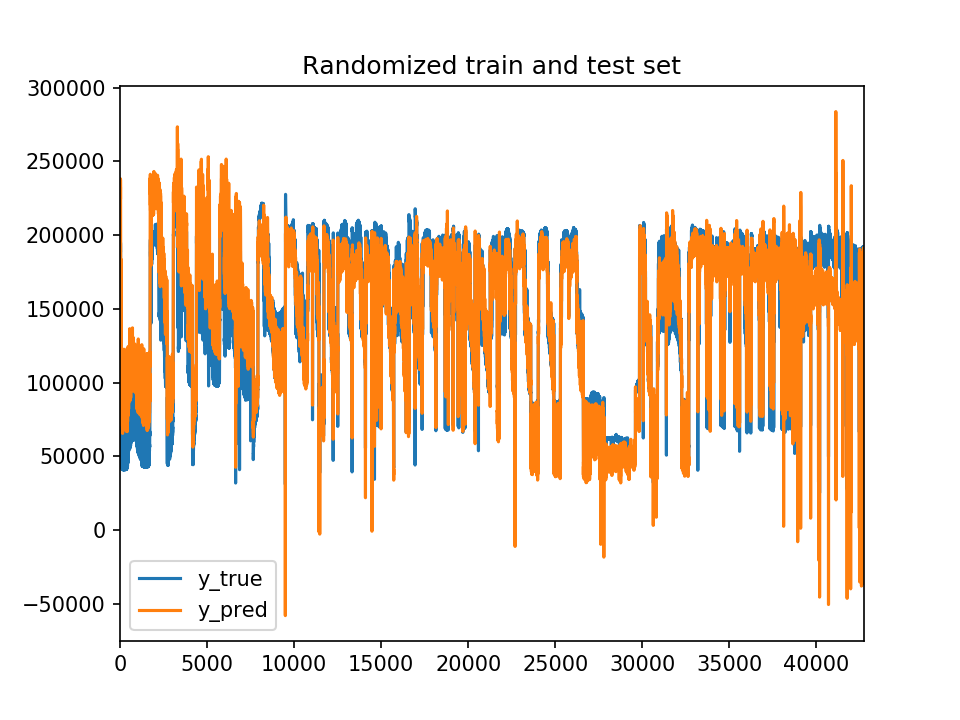

In [8]:
y_df = pd.DataFrame(np.concatenate((y.reshape((y.shape[0],1)), y_pred.reshape((y_pred.shape[0],1))), axis=1))
y_df.columns=['y_true', 'y_pred']
y_df.plot(title='Randomized train and test set')

<IPython.core.display.Javascript object>


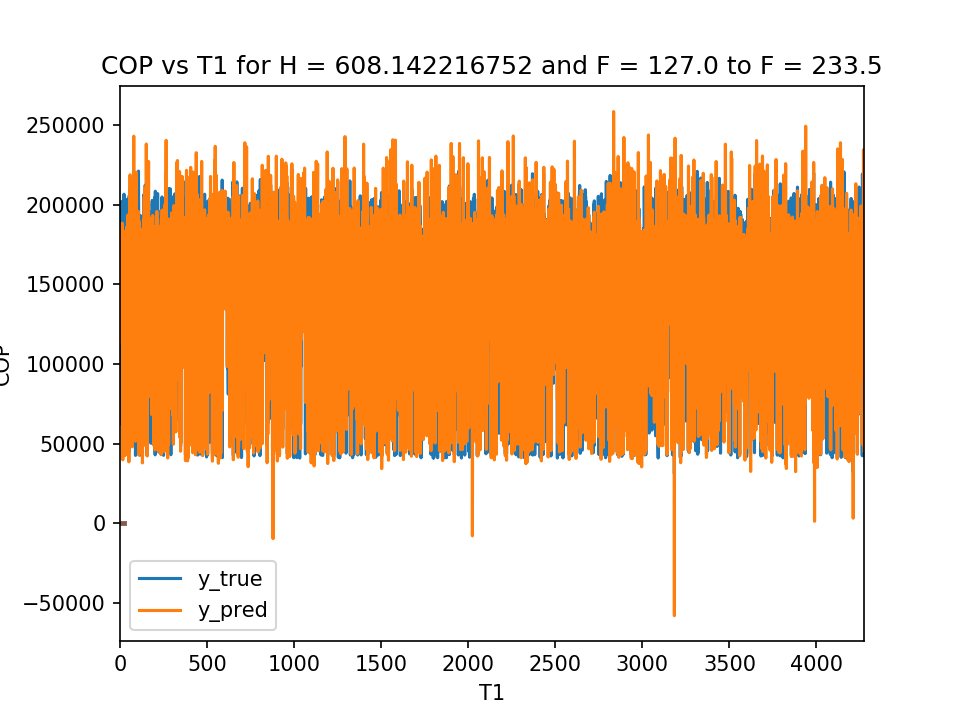

In [9]:
y_test_df = pd.DataFrame(np.concatenate((y_test.reshape((y_test.shape[0],1)), y_pred_test.reshape((y_pred_test.shape[0],1))), axis=1))
y_test_df.columns=['y_true', 'y_pred']
y_test_df.plot(title='Test set')

In [10]:
from sklearn.metrics import mean_absolute_error as mae
print(mae(y_test, y_pred_test))
y_test_df['absolute error'] = abs(y_test_df['y_true'] - y_test_df['y_pred'])
y_test_df['relative error'] = abs(y_test_df['y_true'] - y_test_df['y_pred'])/y_test_df['y_true']
y_test_df.head()
y_test_df.describe()

14741.0447188


,y_true,y_pred,absolute error,relative error
count,4274.000000,4274.000000,4274.000000,4274.000000
mean,146905.279559,147030.441486,14741.044719,0.129033
std,52883.167445,48732.408893,12314.614030,0.164122
min,26598.000000,-58035.943357,12.277821,0.000088
25%,104214.500000,116491.392612,5380.756176,0.037628
50%,173430.000000,162967.886584,11411.263920,0.075261
75%,190051.000000,182933.963302,21017.905089,0.149021
max,221176.000000,258360.611437,110921.613847,2.876971


In [11]:
# value1, evaflowRate, deltaT12, H
regr.score(X_test,y_test)

0.86805582030967698

In [12]:
T1_min=np.array(df[(df['evaflowRate']>125)&(df['totalWatt']>25000)][['value1', 'evaflowRate']].describe().loc['min'])[0]
T1_max=np.array(df[(df['evaflowRate']>125)&(df['totalWatt']>25000)][['value1', 'evaflowRate']].describe().loc['max'])[0]
F_min=np.array(df[(df['evaflowRate']>125)&(df['totalWatt']>25000)][['value1', 'evaflowRate']].describe().loc['min'])[1]
F_max=np.array(df[(df['evaflowRate']>125)&(df['totalWatt']>25000)][['value1', 'evaflowRate']].describe().loc['max'])[1]
H_mean=np.array(df[(df['evaflowRate']>125)&(df['totalWatt']>25000)][['H']].describe().loc['mean'])[0]
df[(df['evaflowRate']>125)&(df['totalWatt']>25000)][['value1', 'evaflowRate','H']].describe()

,value1,evaflowRate,H
count,42739.000000,42739.000000,42739.000000
mean,8.665844,222.036617,608.142217
std,1.208204,4.354516,198.732176
min,4.652710,127.265194,-45.377086
25%,8.188171,221.005180,492.459946
50%,8.615417,221.506607,673.339842
75%,9.117430,224.710419,742.721023
max,23.814699,233.577560,1131.655275


In [13]:
T1=np.arange(np.floor(T1_min), np.ceil(T1_max), 0.5)
F=np.arange(np.floor(F_min), np.ceil(F_max), 0.5)

In [14]:
#H is just deltaT12*F because optimizing ignores constants
H=H_mean
def COP(H,T1,F_full):
    n = len(T1)
    m = len(F_full)
    P_full=np.zeros((n,m))
    i=0
    for F in F_full:
        X=np.array([T1,F*np.ones(n),(H/F)*np.ones(n),H*np.ones(n)]).T
        P = regr.predict(X)
        P_full[:,i]=P
        i+=1
    assert(P_full.shape == (n,m))
    return H/P_full,P_full
COP_T,P_T = COP(H,T1,F)

<IPython.core.display.Javascript object>


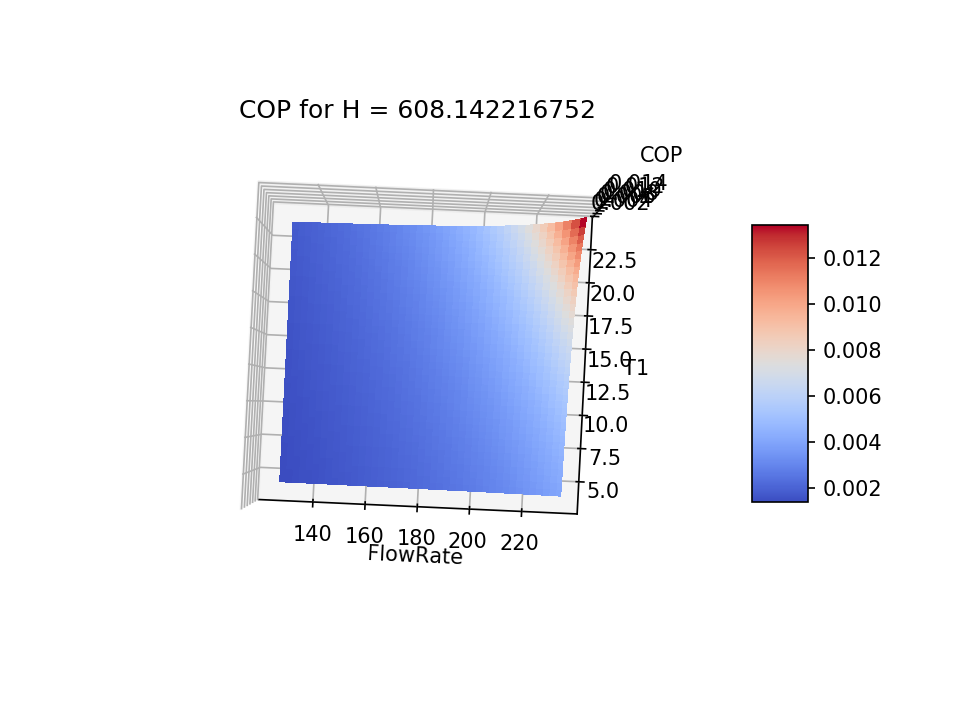

In [22]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
%matplotlib notebook
F_full=np.ones((len(T1),1)).dot(F.reshape(1,len(F)))
T1_full=np.ones((len(F),1)).dot(T1.reshape(1,len(T1))).T

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf=ax.plot_surface(F_full, T1_full, COP_T,cmap=cm.coolwarm,linewidth=0, antialiased=False)
fig.colorbar(surf,shrink=0.5, aspect=5)
ax.set_xlabel('FlowRate')
ax.set_ylabel('T1')
ax.set_zlabel('COP')
ax.set_title('COP for H = '+str(H_mean))

<IPython.core.display.Javascript object>


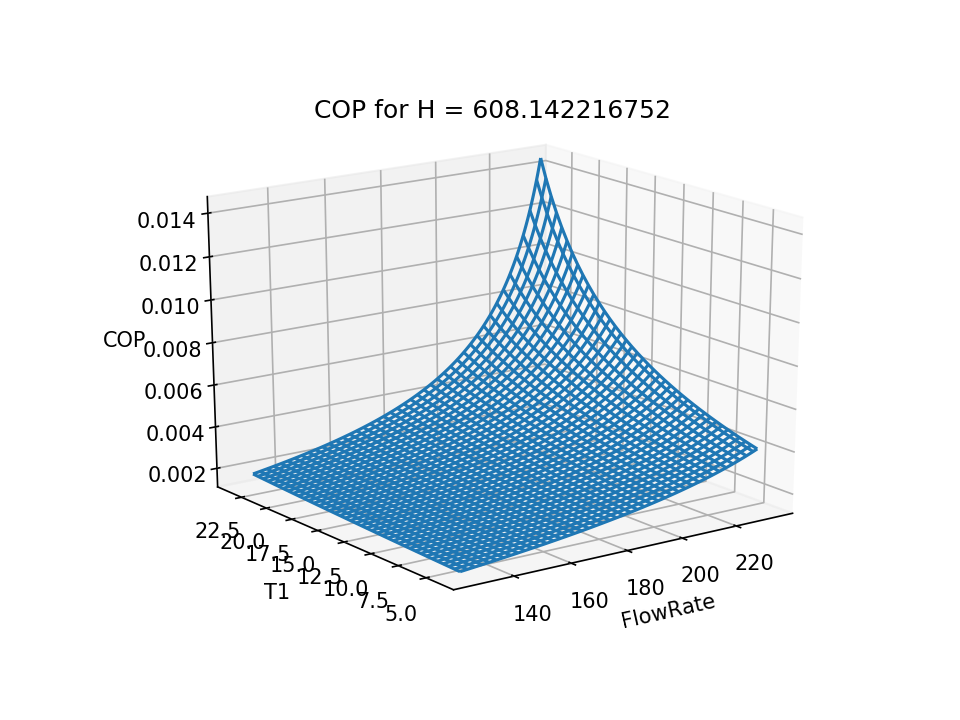

In [23]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.set_xlabel('FlowRate')
ax.set_ylabel('T1')
ax.set_zlabel('COP')
ax.set_title('COP for H = '+str(H_mean))
surf=ax.plot_wireframe(F_full, T1_full, COP_T)